# 📦 Projeto Olist – Análise de E-commerce Brasileiro

## 🎯 Objetivo
Este projeto tem como objetivo analisar dados de pedidos, clientes, produtos, entregas e pagamentos de uma grande plataforma de e-commerce no Brasil.

Usaremos Python com as bibliotecas **Pandas**, **Matplotlib** e **Seaborn** para extrair informações úteis, visualizar tendências e gerar insights.


### 📁 Dados utilizados:
- Pedidos
- Itens de pedido
- Clientes
- Produtos
- Vendedores
- Pagamentos
- Avaliações

# 📁 Etapa 1 - Carregamento

In [167]:
import sys
import os

sys.path.append(os.path.abspath('..')) 

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.carregar_dados import carregar_todos

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

In [169]:
dados = carregar_todos()

orders = dados['orders']
customers = dados['customers']
order_items = dados['order_items']
products = dados['products']
sellers = dados['sellers']
payments = dados['payments']
reviews = dados['reviews']
categories = dados['categories']

dados.keys()

dict_keys(['orders', 'order_items', 'customers', 'products', 'sellers', 'payments', 'reviews', 'categories'])

# 📊 Etapa 2 - Exploração Inicial dos Dados

In [170]:
for nome, df in dados.items():
    print(f'🟦 Tabela: {nome}')
    display(df.head())
    print('-' * 80)

🟦 Tabela: orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


--------------------------------------------------------------------------------
🟦 Tabela: order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


--------------------------------------------------------------------------------
🟦 Tabela: customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


--------------------------------------------------------------------------------
🟦 Tabela: products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


--------------------------------------------------------------------------------
🟦 Tabela: sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


--------------------------------------------------------------------------------
🟦 Tabela: payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


--------------------------------------------------------------------------------
🟦 Tabela: reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


--------------------------------------------------------------------------------
🟦 Tabela: categories


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


--------------------------------------------------------------------------------


In [171]:
for nome, df in dados.items():
    print(f'📋 Estrutura da Tabela: {nome}')
    df.info()
    print('-' * 80)

📋 Estrutura da Tabela: orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
--------------------------------------------------------------------------------
📋 Estrutura da Tabela: order_items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   C

In [172]:
for nome, df in dados.items():
    print(f'📈 Estatísticas Numéricas da Tabela: {nome}')
    display(df.describe())
    print('-' * 80)

📈 Estatísticas Numéricas da Tabela: orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


--------------------------------------------------------------------------------
📈 Estatísticas Numéricas da Tabela: order_items


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


--------------------------------------------------------------------------------
📈 Estatísticas Numéricas da Tabela: customers


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


--------------------------------------------------------------------------------
📈 Estatísticas Numéricas da Tabela: products


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


--------------------------------------------------------------------------------
📈 Estatísticas Numéricas da Tabela: sellers


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


--------------------------------------------------------------------------------
📈 Estatísticas Numéricas da Tabela: payments


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


--------------------------------------------------------------------------------
📈 Estatísticas Numéricas da Tabela: reviews


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


--------------------------------------------------------------------------------
📈 Estatísticas Numéricas da Tabela: categories


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


--------------------------------------------------------------------------------


In [173]:
for nome, df in dados.items():
    print(f'❓ Valores Nulos na Tabela: {nome}')
    display(df.isnull().sum())
    print('-' * 80)

❓ Valores Nulos na Tabela: orders


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

--------------------------------------------------------------------------------
❓ Valores Nulos na Tabela: order_items


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

--------------------------------------------------------------------------------
❓ Valores Nulos na Tabela: customers


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

--------------------------------------------------------------------------------
❓ Valores Nulos na Tabela: products


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

--------------------------------------------------------------------------------
❓ Valores Nulos na Tabela: sellers


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

--------------------------------------------------------------------------------
❓ Valores Nulos na Tabela: payments


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

--------------------------------------------------------------------------------
❓ Valores Nulos na Tabela: reviews


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

--------------------------------------------------------------------------------
❓ Valores Nulos na Tabela: categories


product_category_name            0
product_category_name_english    0
dtype: int64

--------------------------------------------------------------------------------


# 🚀 Etapa 3 - Seleção, limpeza e transformação dos dados

In [174]:
# COLUNAS ESSENCIAIS

orders = dados['orders'][[
    'order_id', 'customer_id', 'order_status',
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]].copy()

# DATA -> DATETIME
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# REMOVE PRODUTOS SEM DATA DE COMPRA OU APROVAÇÃO
orders = orders.dropna(subset=['order_purchase_timestamp', 'order_approved_at'])


print(f"Pedidos válidos após limpeza: {orders.shape[0]}")

Pedidos válidos após limpeza: 99281


In [175]:
# TRATAMENTO DE OUTRAS TABELAS

# Order Items
order_items = dados['order_items'][[
    'order_id', 'order_item_id', 'product_id', 'seller_id',
    'shipping_limit_date', 'price', 'freight_value'
]].copy()
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])


# Payments
payments = dados['payments'][[
    'order_id', 'payment_sequential', 'payment_type',
    'payment_installments', 'payment_value'
]].copy()

# Customers
customers = dados['customers'][[
    'customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
    'customer_city', 'customer_state'
]].copy()

# Sellers
sellers = dados['sellers'][[
    'seller_id', 'seller_zip_code_prefix',
    'seller_city', 'seller_state'
]].copy()

# Products
products = dados['products'][[
    'product_id', 'product_category_name'
]].copy()

# Categories
categories = dados['categories'][[
    'product_category_name', 'product_category_name_english'
]].copy()

print(f"Itens de pedido: {order_items.shape[0]}")
print(f"Pagamentos registrados: {payments.shape[0]}")
print(f"Clientes cadastrados: {customers.shape[0]}")
print(f"Vendedores cadastrados: {sellers.shape[0]}")
print(f"Produtos cadastrados: {products.shape[0]}")
print(f"Categorias disponíveis: {categories.shape[0]}")

Itens de pedido: 112650
Pagamentos registrados: 103886
Clientes cadastrados: 99441
Vendedores cadastrados: 3095
Produtos cadastrados: 32951
Categorias disponíveis: 71


# 🚀 Passo 4 - Unir tabelas (Merge) para consolidar dados

In [176]:
orders_customers = orders.merge(customers, on='customer_id', how='left')
orders_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99276,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99277,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99278,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99279,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [177]:
orders_customers_items = orders_customers.merge(order_items, on='order_id', how='left')

In [178]:
df_merged = orders_customers_items.merge(payments, on='order_id', how='left')

In [179]:
df_merged = df_merged.merge(products, on='product_id', how='left')
df_merged = df_merged.merge(categories, on='product_category_name', how='left')

In [180]:
df_merged = df_merged.merge(sellers, on='seller_id', how='left')

In [181]:
df_merged = df_merged.merge(reviews, on='order_id', how='left')

In [182]:
print(f"Dataset consolidado com {df_merged.shape[0]} linhas e {df_merged.shape[1]} colunas")

Dataset consolidado com 118966 linhas e 33 colunas


In [183]:
df_merged


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,housewares,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,housewares,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,housewares,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,perfumery,31570.0,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,auto,14840.0,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118961,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,baby,17602.0,tupa,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
118962,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,home_appliances_2,8290.0,sao paulo,SP,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
118963,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,computers_accessories,37175.0,ilicinea,MG,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56
118964,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,computers_accessories,37175.0,ilicinea,MG,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


# 📊 Análise do volume de vendas ao longo do tempo

In [184]:
df_merged['order_year_month'] = df_merged['order_purchase_timestamp'].dt.to_period('M')

In [185]:
vendas_mensais = df_merged.groupby('order_year_month')['order_id'].nunique().reset_index()

In [186]:
vendas_mensais['order_year_month'] = vendas_mensais['order_year_month'].astype(str)

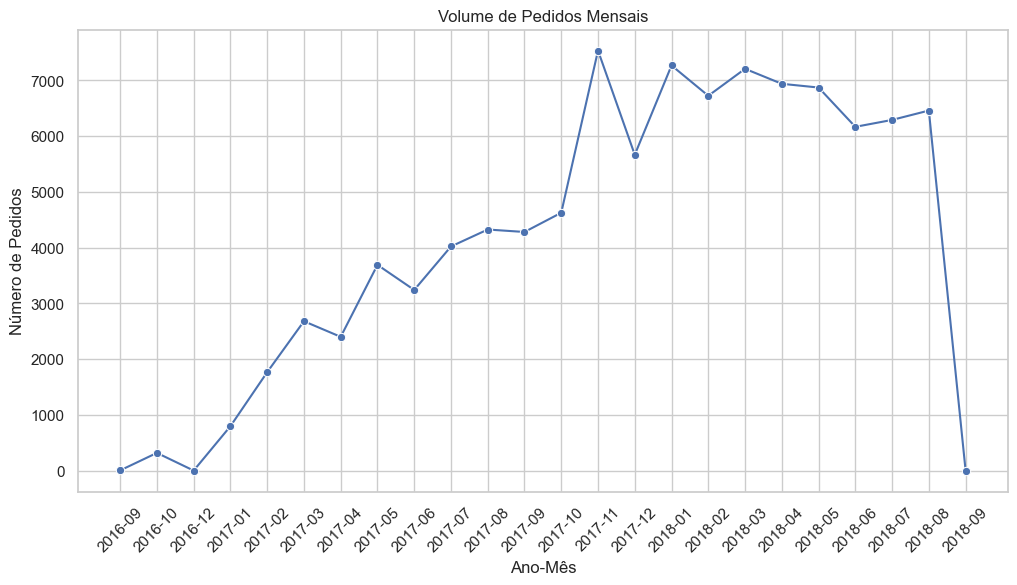

In [187]:
plt.figure(figsize=(12,6))
sns.lineplot(data=vendas_mensais, x='order_year_month', y='order_id', marker='o')
plt.xticks(rotation=45)
plt.title('Volume de Pedidos Mensais')
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.savefig('../outputs/volume_pedidos_mensais.png')
plt.show()

# 📊 Tempo de entrega real vs estimado

In [188]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [189]:
# Tempo real de entrega = data de entrega - data da compra
orders['tempo_entrega_real'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Tempo estimado de entrega = data estimada - data da compra
orders['tempo_entrega_estimado'] = (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']).dt.days

In [190]:
# Se o tempo real for maior que o estimado, houve atraso
orders['houve_atraso'] = orders['tempo_entrega_real'] > orders['tempo_entrega_estimado']


In [191]:
taxa_atraso = orders['houve_atraso'].mean() * 100
print(f'Taxa de pedidos com atraso: {taxa_atraso:.2f}%')

Taxa de pedidos com atraso: 7.36%


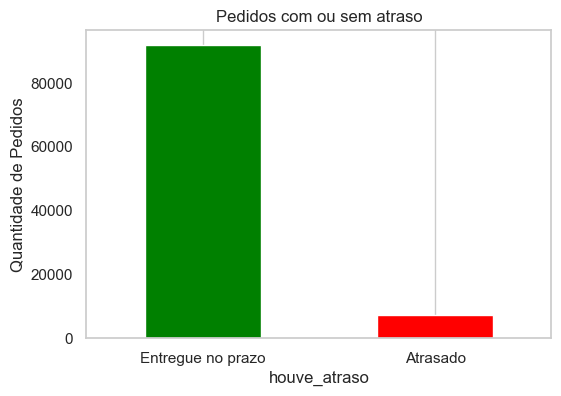

In [192]:
plt.figure(figsize=(6,4))
orders['houve_atraso'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Pedidos com ou sem atraso')
plt.xticks([0,1], ['Entregue no prazo', 'Atrasado'], rotation=0)
plt.ylabel('Quantidade de Pedidos')
plt.grid(axis='y')
plt.savefig('../outputs/pedidos_com_sem_atrasos.png')
plt.show()

# 📊 Performance dos vendedores

In [193]:
vendedor_perf = orders_customers_items.groupby('seller_id').agg(
    total_pedidos=('order_id', 'nunique')
).sort_values(by='total_pedidos', ascending=False).head(10)

vendedor_perf.head(10)

,total_pedidos
seller_id,
6560211a19b47992c3666cc44a7e94c0,1854
4a3ca9315b744ce9f8e9374361493884,1806
cc419e0650a3c5ba77189a1882b7556a,1706
1f50f920176fa81dab994f9023523100,1404
da8622b14eb17ae2831f4ac5b9dab84a,1314
955fee9216a65b617aa5c0531780ce60,1287
7a67c85e85bb2ce8582c35f2203ad736,1157
ea8482cd71df3c1969d7b9473ff13abc,1146
4869f7a5dfa277a7dca6462dcf3b52b2,1132


C:\Users\kabig\AppData\Local\Temp\ipykernel_22892\4196229168.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendedor_perf, x='seller_id', y='total_pedidos', palette='viridis')


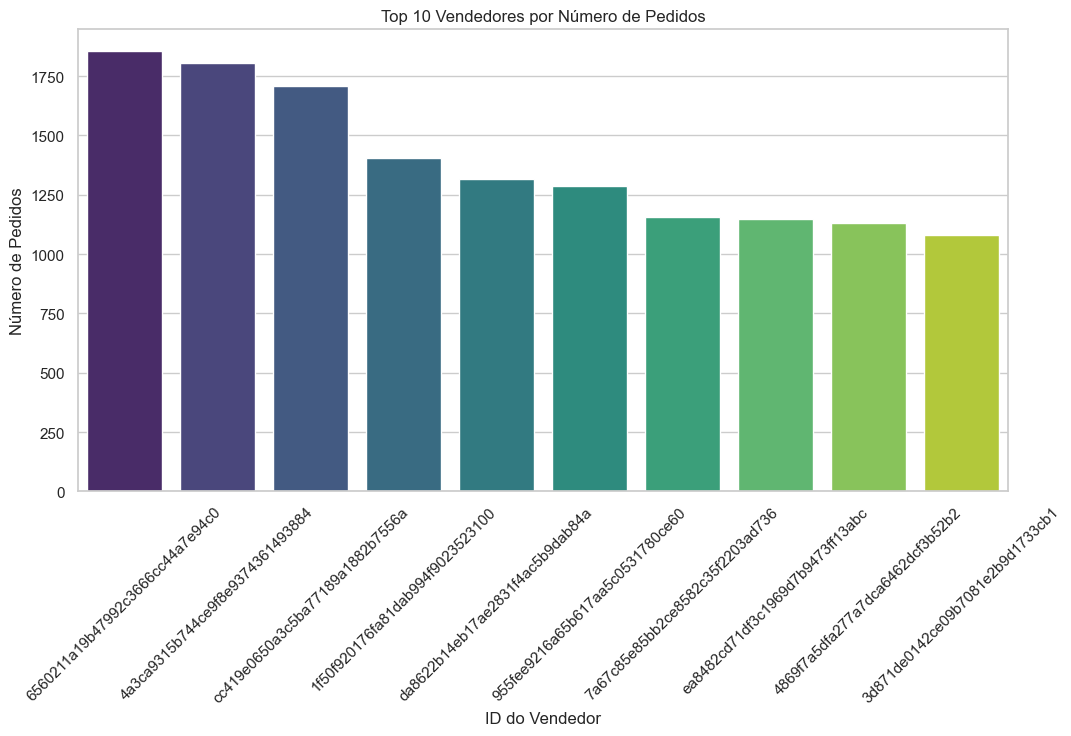

In [194]:
vendedor_perf = vendedor_perf.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=vendedor_perf, x='seller_id', y='total_pedidos', palette='viridis')
plt.title('Top 10 Vendedores por Número de Pedidos')
plt.xlabel('ID do Vendedor')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.savefig('../outputs/top_10_vendedores_por_numeros_de_pedidos.png')
plt.show()

# 💳 Meios de Pagamento Mais Usados

In [195]:
payments_tipo = payments.groupby('payment_type').agg(
    total_pagamentos=('payment_value', 'sum'),
    quantidade=('payment_value', 'count')
).sort_values(by='total_pagamentos', ascending=False)

payments_tipo

,total_pagamentos,quantidade
payment_type,,
credit_card,12542084.19,76795
boleto,2869361.27,19784
voucher,379436.87,5775
debit_card,217989.79,1529
not_defined,0.00,3


C:\Users\kabig\AppData\Local\Temp\ipykernel_22892\3522677829.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payments_tipo, x='payment_type', y='quantidade', palette='pastel')


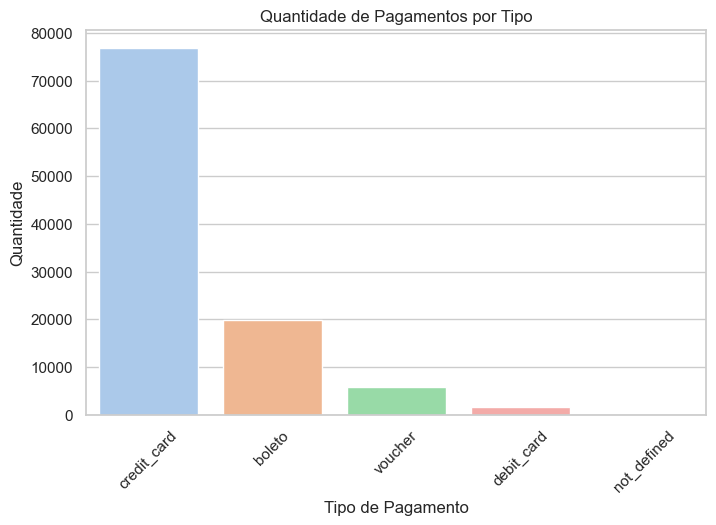

In [196]:
payments_tipo = payments_tipo.reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=payments_tipo, x='payment_type', y='quantidade', palette='pastel')
plt.title('Quantidade de Pagamentos por Tipo')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.savefig('../outputs/pagamentos_por_tipo.png')
plt.show()

# 🌆 Cidades com Maior Volume de Pedidos

In [197]:
pedidos_por_cidade = customers.groupby('customer_city').agg(
    total_pedidos=('customer_id', 'count')
).sort_values(by='total_pedidos', ascending=False).head(10)

pedidos_por_cidade.head(10)

,total_pedidos
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


C:\Users\kabig\AppData\Local\Temp\ipykernel_22892\878028358.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pedidos_por_cidade, y='customer_city', x='total_pedidos', palette='mako')


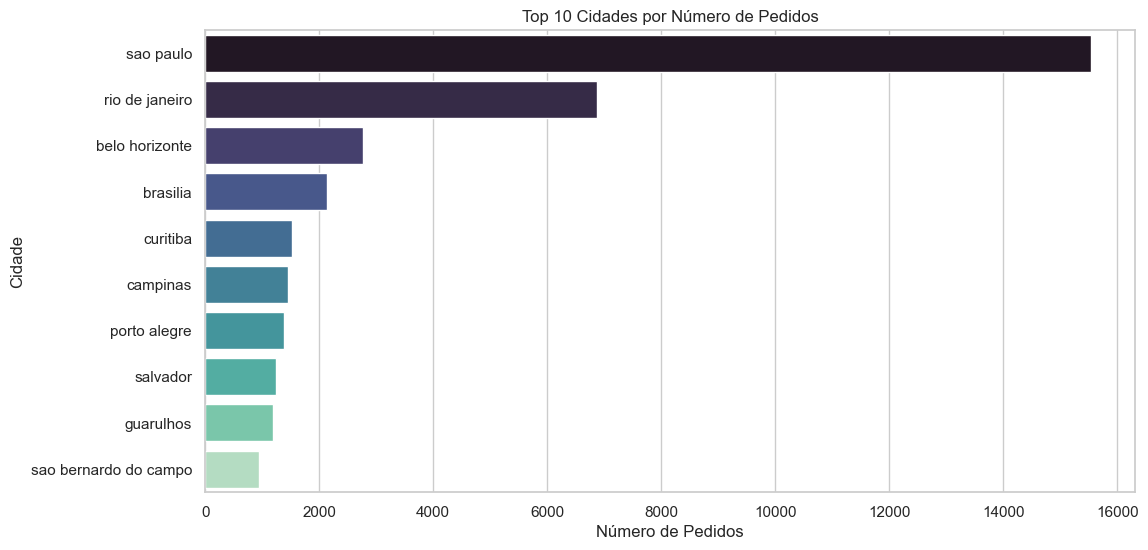

In [198]:
pedidos_por_cidade = pedidos_por_cidade.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=pedidos_por_cidade, y='customer_city', x='total_pedidos', palette='mako')
plt.title('Top 10 Cidades por Número de Pedidos')
plt.xlabel('Número de Pedidos')
plt.ylabel('Cidade')
plt.savefig('../outputs/top_10_cidades_por_pedidos.png')
plt.show()

# 🛍️ Produtos Mais Vendidos

In [199]:
produtos_mais_vendidos = order_items.groupby('product_id').agg(
    quantidade_vendida=('order_id', 'count')
).sort_values(by='quantidade_vendida', ascending=False).head(10)

C:\Users\kabig\AppData\Local\Temp\ipykernel_22892\1866496473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=produtos_mais_vendidos, y='product_id', x='quantidade_vendida', palette='magma')


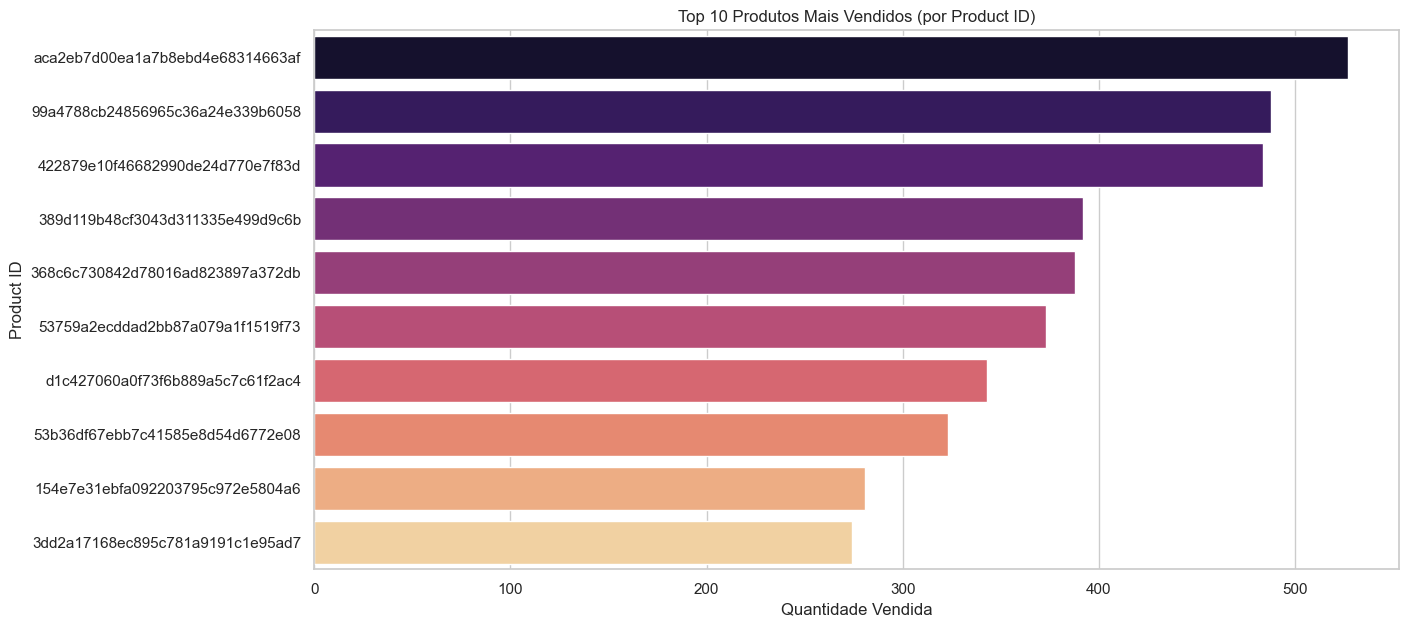

In [200]:
produtos_mais_vendidos = produtos_mais_vendidos.reset_index()

plt.figure(figsize=(14,7))
sns.barplot(data=produtos_mais_vendidos, y='product_id', x='quantidade_vendida', palette='magma')
plt.title('Top 10 Produtos Mais Vendidos (por Product ID)')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Product ID')
plt.savefig('../outputs/top_10_produtos_mais_pedidos.png')
plt.show()

In [201]:
vendas_por_categoria = order_items.merge(products[['product_id', 'product_category_name']],on='product_id', how='left')


vendas_por_categoria = vendas_por_categoria.groupby('product_category_name').agg(
    total_vendido=('order_id', 'count')
).sort_values(by='total_vendido', ascending=False).head(10).reset_index()

C:\Users\kabig\AppData\Local\Temp\ipykernel_22892\4261194427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_por_categoria, y='product_category_name', x='total_vendido', palette='coolwarm')


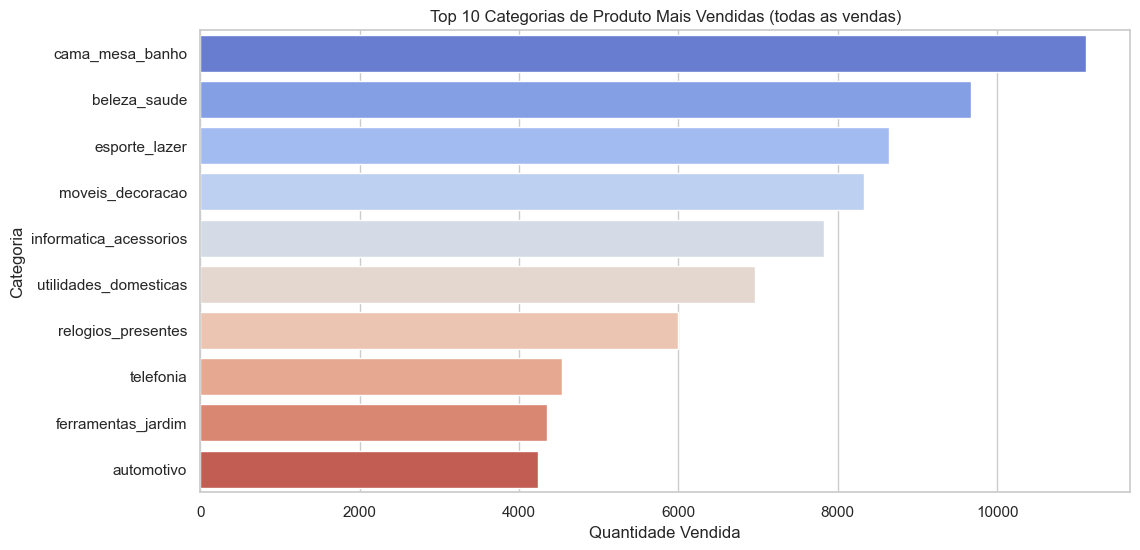

In [202]:
plt.figure(figsize=(12,6))
sns.barplot(data=vendas_por_categoria, y='product_category_name', x='total_vendido', palette='coolwarm')
plt.title('Top 10 Categorias de Produto Mais Vendidas (todas as vendas)')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Categoria')
plt.savefig('../outputs/top_10_categorias_pedidos.png')
plt.show()